# Task 2: Recommend Items

## Prompt:
Continuing from task 1 above, if required, find dataset of customer groceries shopping basket and build a recommended extra item model. For example, provided a shopping basket containing "pasta" and "olive oil", the model may make a recommendation of "canned tomato" as an extra item to be added to the shopping basket.

The outcome of the previous task should be useful for directly feeding into this task, you should look into reusing the output of the previous task for this task.

*Please read the full documentation [[here](https://docs.google.com/document/d/1ZQARiQPf4BdPAFJjts1v5l4Ewr0ICFlaDV9t4mTUxbE/edit?usp=sharing)]*

## Part 0: Research & Gathering Data

Read the full documentation in the [google doc](https://docs.google.com/document/d/1ZQARiQPf4BdPAFJjts1v5l4Ewr0ICFlaDV9t4mTUxbE/edit?usp=sharing).

## Part 1: Preprocess Data

### Step 1: Import Libaries & Data

I first installed mlxtend for data processing and openpyxl to read excel files in .xlsx formats, which two of my datasets had. Next, I imported pandas to work with datasets, and matplotlib.pyplot to create visual graphs later on. I converted the two xlsx raw data files into csv, to match all my other datasets.

In [150]:
import pandas as pd
import matplotlib.pyplot as plt

data1 = (pd.read_csv("data1.csv"))

# convert xlsx raw data file to csv
data2_xlsx = (pd.read_excel("data2.xlsx"))
data2_xlsx.to_csv("data2.csv", index=None, header=True)
data2 = pd.DataFrame(pd.read_csv("data2.csv"))

data3 = (pd.read_csv("data3.csv"))

### Step 2: Standardize Columns & Names

I first copied only the 2 columns I needed: order number and grocery item name. Then, I standardized the names to fit the format of dataset number + original order number.

In [151]:
data1_temp = data1.iloc[:, [0,5]].copy()
data1_temp.columns = ["order_id", "item_name"]
data1_temp['order_id'] = "data1_" + data1_temp['order_id'].astype(str)

data2_temp = data2.iloc[:, [1,2]].copy()
data2_temp.columns = ["order_id", "item_name"]
data2_temp['order_id'] = "data2_" + data2_temp['order_id'].astype(str)

data3_temp = data3.iloc[:, [0,1]].copy()
data3_temp.columns = ["order_id", "item_name"]
data3_temp['order_id'] = "data3_" + data3_temp['order_id'].astype(str)

### Step 3: Convert Wide to Long
As mentioned before, market basket analysis algorithms (i.e. apriori) require transactions with each row being one grocery item inside the basket (long format) instead of one row being one basket (wide format). Therefore, I need to convert all datasets that are in the wide format into long formats. Long formats are also useful in that they remove all null items. 

I create a function called wide_to_long which has four parameters: wide_data, the dataset being inputted, prefix, the string prefix to add to order_id, drop_columns, the list of columns to remove, and empty_val, the values representing missing items to remove them later. The function then returns a new dataframe with two columns, ‘order_id’ and ‘item_name’ as a csv file.

I make a copy of the final_data.csv, drop unwanted columns besides the order number and item name, then create a new column called ‘order_id’ to rename all the order numbers to match the format of dataset number + original order number. This is to prevent potentially more than one datasets having the same order numbers and confusing the model. Then, I replace all the empty values with panda NA, meaning not available, which makes it possible to remove blank items later on. 

Selecting all item name columns besides the ‘order_id’, I used [.melt()](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) to convert the dataset in wide format to long format. .melt() is a pandas function to turn a dataframe into a format where each item is in one row. Next, to clean the datasets, I drop missing items, the temporary column, and keep only the two needed columns of ‘order_id’ and ‘item_name’. Lastly, I add the prefix (dataset number) to all ‘order_id’s, to create a unique id for each basket across all five datasets. I save all these changes into a new csv file. 

In [152]:
def wide_to_long(
    wide_data,
    prefix='data',
    separator='_',
    drop_columns=None,
    empty_val=['', 'None', None]
  ):

  """
  Converts dataset with wide format to long format.

  Parameters:
    wide_data: dataset input
    prefix: the string prefix to add to order_id, to make them distinguishable
    drop_columns: list of columns to remove
    empty_val: values representing missing items used to remove them later

  Returns:
    new dataframe with columns ['order_id', 'item_name'] as a csv file
  """
  data_temp = wide_data.copy()

  if drop_columns:
    data_temp = data_temp.drop(columns=drop_columns)

  data_temp.insert(0, "order_id", data_temp.index)
  data_temp = data_temp.replace(empty_val, pd.NA)

  item_cols = [col for col in data_temp.columns if col.startswith('Item') or col not in ['order_id']]

  data = data_temp.melt(
    id_vars='order_id',
    value_vars=item_cols,
    var_name='temp',
    value_name='item_name'
  )

  data = data.dropna(subset=['item_name'])
  data = data.drop(columns='temp')
  data = data[['order_id', 'item_name']].reset_index(drop=True)
  data['order_id'] = prefix + separator + data['order_id'].astype(str)

  print(data)

  data.to_csv(f"{prefix}.csv", index=False)

data4_wide = pd.read_csv("data4_wide.csv")
data4 = wide_to_long(
  wide_data=data4_wide,
  prefix="data4",
  drop_columns="Item(s)"
)
data4_temp = (pd.read_csv("data4.csv"))

data5_wide = pd.read_csv("data5_wide.csv")
data5 = wide_to_long(
  wide_data=data5_wide, 
  prefix="data5"
)
data5_temp = (pd.read_csv("data5.csv"))

         order_id                 item_name
0         data4_0              citrus fruit
1         data4_1            tropical fruit
2         data4_2                whole milk
3         data4_3                 pip fruit
4         data4_4          other vegetables
...           ...                       ...
41581  data4_9792               hard cheese
41582  data4_9796             sweet spreads
41583  data4_9817  long life bakery product
41584  data4_9821            red/blush wine
41585  data4_9830                     flour

[41586 rows x 2 columns]
         order_id        item_name
0         data5_0          burgers
1         data5_1          chutney
2         data5_2           turkey
3         data5_3    mineral water
4         data5_4   low fat yogurt
...           ...              ...
29253  data5_6521  frozen smoothie
29254  data5_6593      yogurt cake
29255  data5_6971      protein bar
29256  data5_7179        green tea
29257  data5_7341     tomato juice

[29258 rows x 2 columns]


### Step 4: Combine Datasets & Save Final Data

Now that all my datasets are in the same long format saved as csv files, I concatenate all datasets into one final dataset.

In [153]:
final_data = pd.concat([data1_temp, data2_temp, data3_temp, data4_temp, data5_temp], ignore_index=True)

# remove duplicates: items that appear twice in same basket
final_data = final_data.drop_duplicates()

final_data.to_csv("final_data.csv", index=False)

print(final_data)

          order_id           item_name
0       data1_1000         Wheat Flour
1       data1_1000  Dishwashing Liquid
2       data1_1000              Pastry
3       data1_1000              Marker
4       data1_1001               Saree
...            ...                 ...
125084  data5_6521     frozen smoothie
125085  data5_6593         yogurt cake
125086  data5_6971         protein bar
125087  data5_7179           green tea
125088  data5_7341        tomato juice

[120705 rows x 2 columns]


## Part 2: Convert Long Format to Binary Matrix

### Step 1: Group Items Per Basket

Market basket analysis apriori algorithm requires transactions, meaning I need to convert the long formats into a list of baskets where the list of grocery items bought in one order number is in one list. The structure needs to be a list of lists. So, I group the final_data into rows with the same order_id and convert them into a python list. With the grouped baskets, I turn it into a list of lists.

In [ ]:
grouped = final_data.groupby("order_id")["item_name"].apply(list)
transactions = grouped.tolist()

# print the first 5 baskets
for i, basket in enumerate(transactions[:5]):
    print(f"Basket {i}: {basket}")

Basket 0: ['Wheat Flour', 'Dishwashing Liquid', 'Pastry', 'Marker']
Basket 1: ['Saree', 'Spinach', 'Face Wash', 'Energy Drink', 'Mixer Grinder', 'Fish', 'Apple']
Basket 2: ['Cookies', 'Chicken Breast', 'Butter', 'Dress']
Basket 3: ['Vitamins', 'Dishwashing Liquid', 'Apple']
Basket 4: ['Pastry', 'Salt', 'Notebook', 'Tissue']


### Step 2: Use mlxtend's TransactionEncoder

Now that I have the dataset in the list of lists, I import TransactionEncoder from mlxtend to convert the lists into a binary matrix, apriori and association_rules to use the apriori algorithm and generate association rules from frequent itemsets to give recommendations.

I create a TransactionEncoder object called te and use .fit() to learn the data in my dataset and .transform() to convert my dataset into binary True or False. After, I convert the binary array into a pandas DataFrame, because the apriori() function does not accept plain numpy arrays.

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

te = TransactionEncoder()

# fit the encoder on my data and transform it into a 0 or 1 binary array
te_array = te.fit(transactions).transform(transactions)

# convert the array into a pandas DataFrame
basket = pd.DataFrame(
  te_array, 
  columns=te.columns_, 
  index=grouped.index
).sort_index()

print(basket.head())

             asparagus  Apple  Apples  Baby Food  Banana  Bananas   Beef  \
order_id                                                                   
data1_1000       False  False   False      False   False    False  False   
data1_1001       False   True   False      False   False    False  False   
data1_1002       False  False   False      False   False    False  False   
data1_1003       False   True   False      False   False    False  False   
data1_1004       False  False   False      False   False    False  False   

             Belt  Biscuits  Bread  ...  white wine  whole milk  \
order_id                            ...                           
data1_1000  False     False  False  ...       False       False   
data1_1001  False     False  False  ...       False       False   
data1_1002  False     False  False  ...       False       False   
data1_1003  False     False  False  ...       False       False   
data1_1004  False     False  False  ...       False       False  

## Part 3: Apply Apriori Algorithm

### Step 1: Apply Apriori to Find Frequent Itemsets

Now, I finally run the apriori algorithm on my dataset using apriori(). It has 4 parameters: basket, the binary dataset, min_support, keeping only the itemsets that appear in at least one percent of all the order numbers, use_colnames=True, showing real item names in text rather than column numbers, and max_len=None, to set no limits on how many items can be in one basket.

To test, I print the number of frequent itemsets found and the top 10 frequent itemsets ordered by support. 


In [156]:
frequent_itemsets = apriori(
  basket, 
  min_support=0.01, # keep only itemsets that appear in > 1% of all baskets
  use_colnames=True, # showing real item names rather than column #s
  max_len=None # no limit on how many items can be in a set
)

print(f"Found {len(frequent_itemsets)} frequent itemsets")
print(frequent_itemsets.sort_values('support', ascending=False).head(10))

Found 386 frequent itemsets
      support            itemsets
73   0.154853  (other vegetables)
84   0.144501        (rolls/buns)
97   0.134791              (soda)
113  0.116610            (yogurt)
111  0.107499        (whole milk)
85   0.095436   (root vegetables)
91   0.088292           (sausage)
22   0.084741         (chocolate)
105  0.083116    (tropical fruit)
7    0.080164     (bottled water)


### Step 2: Generate Association Rules

There are three important measures I needed to know to use the apriori algorithm: support, confidence and lift. Support is used to measure the frequency of how many times an itemset occurs in the dataset. It is calculated by the number of transactions containing X by the total number of transactions. 

Confidence is used to measure the likelihood that item Y is purchased when item X is purchased. This is calculated by support of transactions containing both X and Y divided by support of transactions containing X.

Lift is used to quantify how much more likely the consequent—the following result—is likely to occur when the antecedent—the condition—is present. 

For the next step, I used association_rules from the apriori algorithm library, to generate a dataframe with columns of antecedents (items in basket), consequents (items to recommend), support, confidence, and lift. Then I sorted the rules by lift (strongest association) and then confidence (reliable rules). 




In [157]:
assoc_rules = association_rules(
  frequent_itemsets,
  metric="lift",
  min_threshold=1.0 # threshold > 1 means positive relationship
)

# sort first by lift then by confidence
assoc_rules = assoc_rules.sort_values(['lift', 'confidence'], ascending=[False, False])

print(f"\n{len(assoc_rules)} strong rules ")

# antecedents = grocery items in basket
# consequents = what model should recommend
# confidence = how often do customer also buy consequents if they do buy antecedents
# lift = how much stronger is this than random
print(assoc_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(15))


678 strong rules 
                             antecedents                          consequents  \
499          (other vegetables, sausage)                    (italian sausage)   
502                    (italian sausage)          (other vegetables, sausage)   
221                        (ground beef)                          (spaghetti)   
220                          (spaghetti)                        (ground beef)   
498  (other vegetables, italian sausage)                            (sausage)   
503                            (sausage)  (other vegetables, italian sausage)   
241                    (italian sausage)                         (small milk)   
240                         (small milk)                    (italian sausage)   
238                    (italian sausage)                            (sausage)   
239                            (sausage)                    (italian sausage)   
278                           (med milk)                         (small milk)   
279      

### Step 3: Visualize Using matplotlib

To better visualize these numbers of support, confidence, and lift, I generated a scatter plot from the [matplotlib library](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html). I followed this example [documentation](https://matplotlib.org/stable/gallery/color/colorbar_basics.html) to create a colorbar on the right side. I create a blank canvas of 10 x 6 inches and plot transparent circles of various sizes and colors corresponding to the values of support, confidence, and lift.


colorbar: https://matplotlib.org/stable/gallery/color/colorbar_basics.html

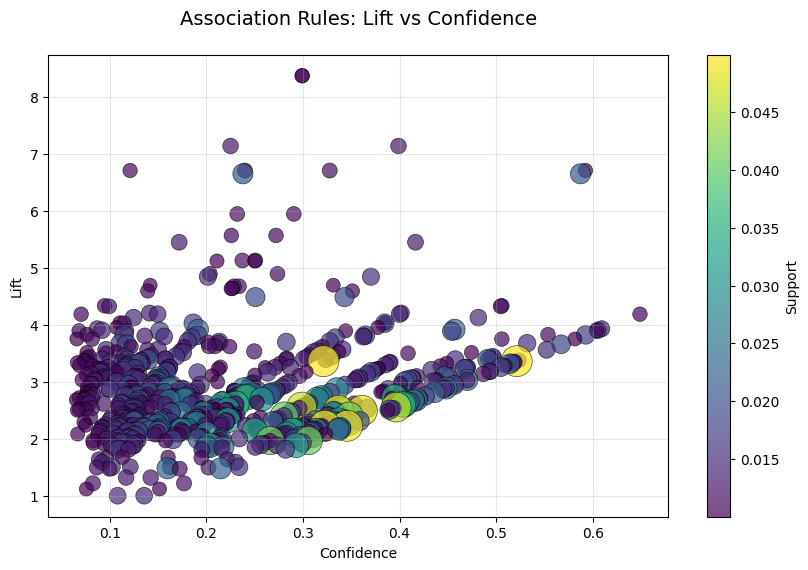

In [158]:
plt.figure(figsize=(10, 6)) # blank canvas 10 in x 6 in

scatterplot = plt.scatter(
  assoc_rules['confidence'],
  assoc_rules['lift'],
  s=assoc_rules['support'] * 10000, # the support num determines how big the circles are
  c=assoc_rules['support'], # the support num determines how dark the circles are
  cmap='viridis', # specific type of uniform colormaps
  alpha=0.7, # increase transparency, making overlapping bubbles visible
  edgecolors='black', # black edges to circles
  linewidth=0.5 # average thickness of the outline weight
)

# adds a visual vertical scale on the right, showing which colors are which support numbers
plt.colorbar(scatterplot, label='Support')

# Bigger & Darker = More Frequent
plt.title('Association Rules: Lift vs Confidence\n', fontsize=14)

plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.grid(True, alpha=0.3) # adds a grey grid in the background
plt.show()

## Part 4: Create Recommendation Function

### Step 1: Create a Recommendation Function Just Using This Model

Before using my prediction model from task 1, I first created a simple function to recommend items (or not, if there are no associations) based on the grocery item passed into it. Inside the function, I convert the string input into a list to standardize the input format and keep the grocery name as one word instead of each individual character. Then, I go through each of the items in a basket and check if any of them are in the antecedent, and if it does match an antecedent, it returns True. I used [this page](https://drlee.io/turn-your-transaction-data-into-revenue-build-a-market-basket-analysis-system-with-python-bolt-new-71835484a34c) as a reference to help me with this step.

However, if there are no rules associated with that product name, then I returned “No recommendation found” for now. I will address this later on. If there are rules, then the function selects the strongest rule with the largest lift and recommends one item from that set of items.



In [159]:
def get_recommendations(items_in_basket, rules=assoc_rules):

  if type(items_in_basket) == str:
    item_list = [items_in_basket]
  else:
    item_list = list(items_in_basket)

  relevant_rules = rules[
    rules['antecedents'].apply(lambda x: any(i in x for i in item_list))
  ]

  if relevant_rules.empty:
    return "No recommendation found"
  
  highest_rule = relevant_rules.nlargest(1, 'lift').iloc[0]

  recommend_item = list(highest_rule['consequents'])[0]

  return recommend_item

In [ ]:
get_recommendations("bread")

'root vegetables'

### Step 2: Hybrid Recommender Using Model from Task 1

The recommender function above fails to recommend items when there are no association rules found with that item. To fix this, I used the category prediction model I made from task 1 to category the grocery item and just return the grocery item name that is most commonly found in that category. 

I used [joblib](https://joblib.readthedocs.io/en/stable/), a python library for saving and loading python objects, to make importing and calling the task 1 model easier. In task 1, I used [.dump()](https://joblib.readthedocs.io/en/latest/generated/joblib.dump.html) to save the vectorizer object and model object as an individual .pkl file, which serializes two numpy arrays of feature and label. I need to save both the vectorizer and the actual model because the task 1 model was trained on TF-IDF vectors instead of raw text. However, task 2 passes on raw strings, so I need to access the vectorizer object from task 1.

When the task 2 model cannot generate any recommendations, I am using the task 1 prediction model to find the most common grocery item in the category. Therefore, in task 1, I created a new python dictionary, and looped through each row of the “Category” column to count how much of each data was in each category, and saved the most common grocery item into a new list. To access this list of most common item in the categories, I also saved this as a .pkl file using joblib.

Keeping the previous recommendation function, I only made changes to when there is no association found for that grocery item. 

I created a new get_hybrid_recommendations() function to run, instead of printing “No recommendations found.” The get_hybrid_recommendations() takes a single parameter of the grocery item passed into the parent function as a string, and returns the most common item from the predicted category of that grocery item using the models from task 1. The function checks if the grocery item is a string type; if it isn’t, it turns it into a string. Then it converts the string into a vector using the vectorizer function loaded from task 1, and predicts the category using the prediction function. Finally, it returns the most common items in that category, also loaded from task 1.




In [161]:
import joblib

# load model from task 1
task1_vectorizer = joblib.load('task1_vectorizer.pkl')
task1_model = joblib.load('task1_model.pkl')
task1_top_items = joblib.load("most_common_in_category.pkl")

def get_recommendations(items_in_basket, rules=assoc_rules):
  """
  Parameters: grocery items in str
  Return: recommended item using the association rule trained on apriori algorithm
  """

  if type(items_in_basket) == str:
    item_list = [items_in_basket]
  else:
    item_list = list(items_in_basket)

  relevant_rules = rules[
    rules['antecedents'].apply(lambda x: any(i in x for i in item_list))
  ]

  if relevant_rules.empty:
    get_hybrid_recommendations(items_in_basket)
  
  highest_rule = relevant_rules.nlargest(1, 'lift').iloc[0]

  recommend_item = list(highest_rule['consequents'])[0]

  return recommend_item


def get_hybrid_recommendations(items_in_basket):
  """
  Parameters: single item in str
  Return: most common item from the predict category
  """

  if not isinstance(items_in_basket, str):
    items_in_basket = str(items_in_basket)

  # convert the str user input to vector using the TF-IDF from task 1
  item_vec = task1_vectorizer.transform([items_in_basket])
  predicted_category = task1_model.predict(item_vec)[0]

  # return the most common item in that predicted category
  # if no entry, return the category as fallback
  return task1_top_items.get(predicted_category, predicted_category)

get_hybrid_recommendations("beef, apple")

'spinach'

### Step 3: Quick User Input Test

In [163]:
while True:
  product_name = input("Enter product name (or type 'exit' to quit): ")

  if product_name.lower() == 'exit':
    break

  recommendation = get_hybrid_recommendations(product_name)

  print(f"Recommendation: {recommendation}\n")

Recommendation: milk

Recommendation: spinach

